# Milestone 1: Project Proposal and Data Selection/Preparation.

## Author: Gaurab Kundu

This Notebook refers to the first week of the final project of the Learn SQL Basics for Data Science Specialization.

### Project Guideline

You are a data scientist working for a data analytics firm.  Your firm has explored a multitude of data sources and is tasked with providing key insights that your clients can make actionable. Your manager has asked you to provide some data analytics guidance for one of the firm’s clients.

In a typical scenario, you would iteratively work with your client to understand the data wanting to be analyzed.  Having a solid understanding of the data and any underlying assumptions present is crucial to the success of a data analysis project.  However, in this case, you will need to do a little more of the “heavy lifting”.

To begin, I will prepare a project proposal detailing: 

1. The questions we are wanting to answer, 

2. Initial hypothesis about the data relationships, and 

3. The approach I will take to get my answers.  

### Project Proposal

### Step 1: Preparing for our Proposal

### 01. Which client/dataset did you select and why?

I selected the Client 3: SportsStats (Olympics Dataset - 120 years of data)

SportsStats is a sports analysis firm partnering with local news and elite personal trainers to provide “interesting” insights to help their partners. Insights could be patterns/trends highlighting certain groups/events/countries, etc. for the purpose of developing a news story or discovering key health insights.

I chose this dataset as working on this dataset will help me to know more about the representation of athletes and countries in the Olympic Games. Also due to the smaller file size compared to the other options, I chose this Dataset. 

### 02. Describing the steps I took to import and clean the data.

As the data is available in a CSV file, I imported it into a Notebook to perform my first analysis using Python. 

- To perform the cleanup I removed duplicate values to understand the number of athletes involved in the games, and also some of the empty values.

Out of the 271,116 data points, 

- 9,474 have no age value, 

- 60,171 have no height value, 

- 62,875 have no weight value. 

- The values for Gender, Games and their attributes (year, city, etc.) are complete. 

As team names can change, using NOC would be more efficient.

### 03. Initial Exploratory Data Analysis 

In [23]:
# Loading necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Loading the Dataset
athelete_events_df = pd.read_csv("E:/UNIVERSITY OF CALIFORNIA DEVIS/Learn SQL Basics for Data Science Specialization/4 SQL for Data Science Capstone/UCDavis-SQL-for-Data-Science-Capstone-Project/Data/athlete_events.csv")
noc_regions_df = pd.read_csv("E:/UNIVERSITY OF CALIFORNIA DEVIS/Learn SQL Basics for Data Science Specialization/4 SQL for Data Science Capstone/UCDavis-SQL-for-Data-Science-Capstone-Project/Data/noc_regions.csv")

In [10]:
# Lets have a quick look into the Data to get familiar of the different elements in it.

athelete_events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
noc_regions_df

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [12]:
# I want to know how many athletes we have of each gender.
grouped = athelete_events_df.groupby(athelete_events_df["Sex"])
print("Male athletes")
print(grouped.get_group("M").nunique())
print("---")
print("Female athletes")
print(grouped.get_group("F").nunique())

Male athletes
ID        101590
Name      100979
Sex            1
Age           74
Height        92
Weight       206
Team        1154
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         63
Event        554
Medal          3
dtype: int64
---
Female athletes
ID        33981
Name      33808
Sex           1
Age          62
Height       77
Weight      140
Team        374
NOC         222
Games        50
Year         34
Season        2
City         42
Sport        53
Event       269
Medal         3
dtype: int64


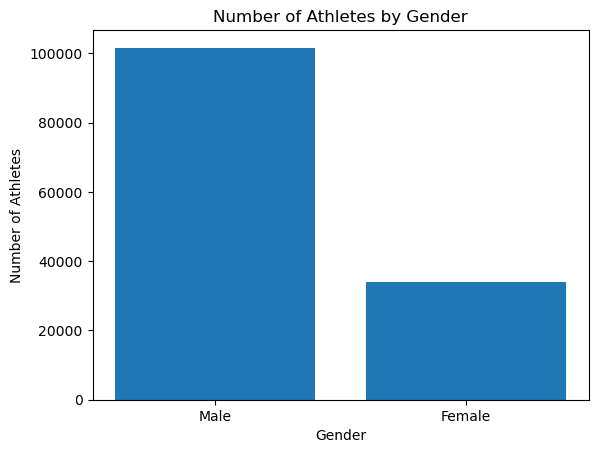

In [14]:
# Making a plot to better understand the Q1: What is the disparity between the sexes during the games;
# Group the dataframe by gender
grouped = athelete_events_df.groupby(athelete_events_df["Sex"])

# Get the count of unique athletes for each gender
male_counts = grouped.get_group("M")["ID"].nunique()
female_counts = grouped.get_group("F")["ID"].nunique()

# Plotting the data
labels = ['Male', 'Female']
counts = [male_counts, female_counts]

plt.bar(labels, counts)
plt.xlabel('Gender')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes by Gender')

plt.show()



In [20]:
# I want to know how many unique athletes we have of each gender who has won medal
gender_df = athelete_events_df.drop(
    ["ID", 
     "Name", 
     "Age", 
     "Height", 
     "Weight", 
     "Team", 
     "NOC", 
     "Games", 
     "Year", 
     "Season", 
     "City", 
     "Sport", 
     "Event"], 
     axis='columns')
gender_df = gender_df.dropna()
gender_df.groupby("Sex").count()

,Medal
Sex,
F,11253
M,28530


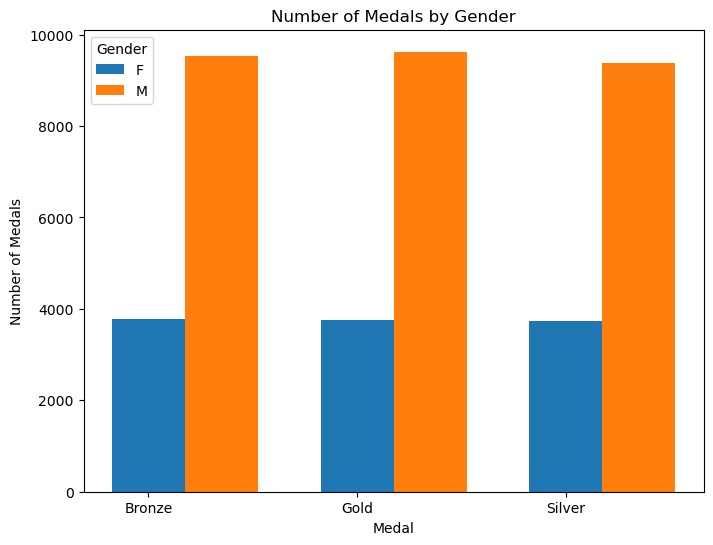

In [24]:

# Group the DataFrame by "Medal" and "Sex" columns
grouped = gender_df.groupby(["Medal", "Sex"])

# Count the number of medals won by each gender for each medal type
medal_counts = grouped.size().unstack()

# Get the medal types and genders
medals = medal_counts.index
genders = medal_counts.columns

# Set the width of each bar
bar_width = 0.35

# Calculate the x-axis positions for each bar
x = np.arange(len(medals))

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting bars for each gender
for i, gender in enumerate(genders):
    ax.bar(x + i * bar_width, medal_counts[gender], bar_width, label=gender)

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(medals)

plt.xlabel('Medal')
plt.ylabel('Number of Medals')
plt.title('Number of Medals by Gender')

plt.legend(title='Gender')
plt.show()



In [28]:
# Which countries have more representation, and how was the evolution of this representation;

# Group the DataFrame by country and year
grouped = athelete_events_df.groupby(["NOC", "Year"])

# Calculate the number of athletes representing each country in each year
country_counts = grouped["ID"].nunique()

# Convert the series to a DataFrame
representation_df = pd.DataFrame(country_counts).reset_index()
representation_df.columns = ["Country", "Year", "Athlete Number"]

# Display the representation values for each country
print(representation_df)


     Country  Year  Athlete Number
0        AFG  1936              15
1        AFG  1948              25
2        AFG  1956              12
3        AFG  1960              12
4        AFG  1964               8
...      ...   ...             ...
3300     ZIM  2004              12
3301     ZIM  2008              13
3302     ZIM  2012               7
3303     ZIM  2014               1
3304     ZIM  2016              30

[3305 rows x 3 columns]


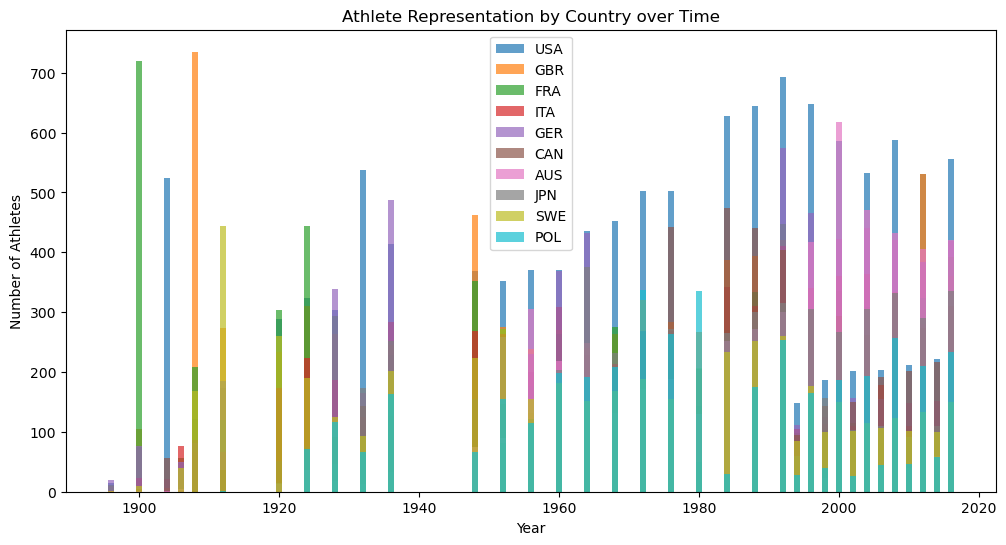

In [16]:
# Group the DataFrame by country and year
grouped = athelete_events_df.groupby(["NOC", "Year"])

# Calculate the number of athletes representing each country in each year
country_counts = grouped["ID"].nunique()

# Calculate the total representation for each country over the years
country_representation = country_counts.groupby("NOC").sum()

# Sort the countries by representation in descending order
top_countries = country_representation.sort_values(ascending=False).head(10)

# Prepare data for plotting
years = country_counts.index.get_level_values("Year").unique()
country_data = {}
for country in top_countries.index:
    representation = country_counts.loc[country].reindex(years, fill_value=0)
    country_data[country] = representation.values

# Plot the bar chart for the top countries
plt.figure(figsize=(12, 6))
for i, country in enumerate(top_countries.index):
    plt.bar(years, country_data[country], label=country, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Athlete Representation by Country over Time')
plt.legend()
plt.show()


In [29]:

# Group the DataFrame by country
grouped = athelete_events_df.groupby("NOC")

# Calculate the total number of medals won by each country
medal_counts = grouped["Medal"].count()

# Sort the countries by medal count in descending order
top_countries = medal_counts.sort_values(ascending=False).head(10)

# Display the top-performing countries
print("Top Performing Countries:")
for country, count in top_countries.items():
    print(f"{country}: {count} medals")


Top Performing Countries:
USA: 5637 medals
URS: 2503 medals
GER: 2165 medals
GBR: 2068 medals
FRA: 1777 medals
ITA: 1637 medals
SWE: 1536 medals
CAN: 1352 medals
AUS: 1320 medals
RUS: 1165 medals


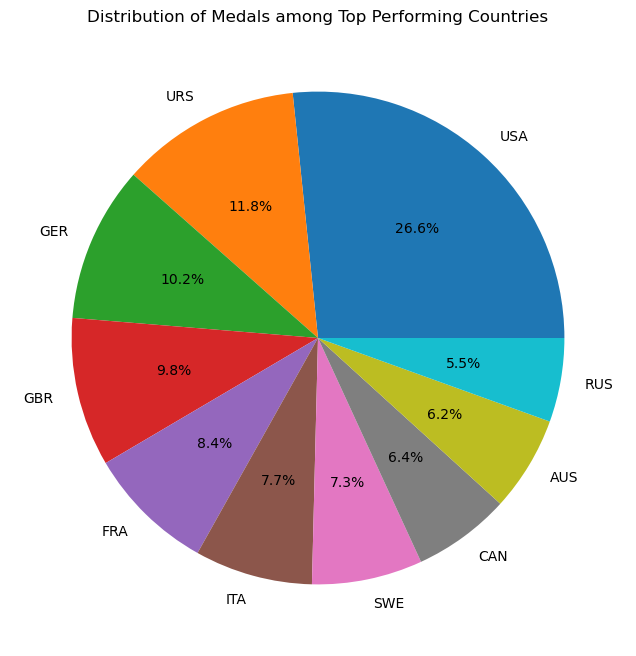

In [30]:

# Group the DataFrame by country
grouped = athelete_events_df.groupby("NOC")

# Calculate the total number of medals won by each country
medal_counts = grouped["Medal"].count()

# Sort the countries by medal count in descending order
top_countries = medal_counts.sort_values(ascending=False).head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
plt.title('Distribution of Medals among Top Performing Countries')

plt.show()


### 04 ERD or proposed ERD to show the relationships of the data I am exploring. 

<img src="https://github.com/GaurabKundu1/UCDavis-SQL-for-Data-Science-Capstone-Project/assets/86102231/c806f5df-7d05-4caf-9d39-153ce67c3fa4">

### Step 2: Develop Project Proposal

### Description

For this project, I want to understand how female inclusion has evolved over the years. Identify the difference in performance between athletes, and which countries have the best performance. This project will be helpful for those who wants to understand about the diversity of people by sexes in the games, and wants to know representation of countries in such games. 

### Questions

Q1: What is the ratio between the sexes during the games;

Q2: Which countries have more representation, and how was the evolution of this representation;

Q3: Which countries have the best performance in the games.

### Hypothesis

My initaial hypothesis about the data were:

- There are more male atheletes than female

- More medals are won by male atheletes

- Usualy European countries have more atheletes than of other regional countries

- Countries from North America specially USA has won most medals.

### Approach

- Loaded and explored the data

- Tried to figure out the relaionship betwen the datasets

- Created various plots to better understand the data and answer the questions
